# =============================================
# 📘 CUSTOMER CHURN PREDICTION PROJECT
# =============================================

In [23]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import pickle
import warnings
warnings.filterwarnings('ignore')


# Step 2: Load Dataset


In [24]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Step 3: Data Overview

In [25]:

print("Shape of data:", df.shape)
print("Columns:", df.columns)
df.head()

Shape of data: (7043, 21)
Columns: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Step 4: Data Cleaning

In [26]:
# Drop customerID - not useful
df.drop('customerID', axis=1, inplace=True)

In [27]:
# Convert 'TotalCharges' to numeric (some values are blank)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [28]:
# Handle missing values
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


# Step 5: EDA (Exploratory Data Analysis)

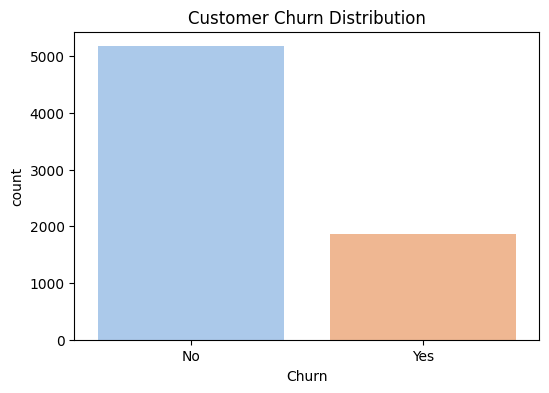

In [29]:

plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df, palette='pastel')
plt.title('Customer Churn Distribution')
plt.show()

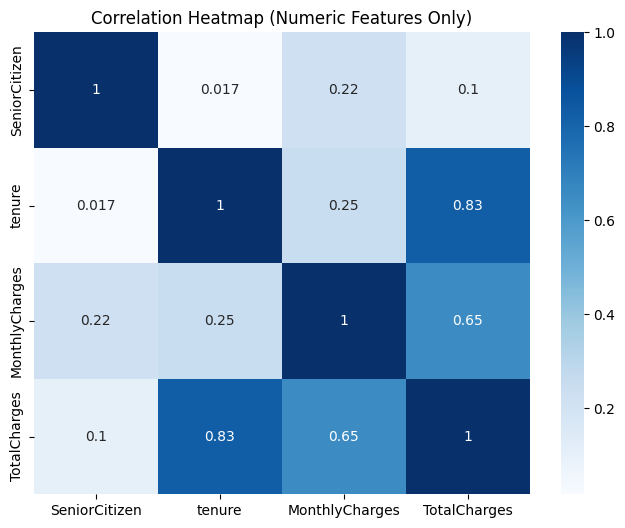

In [30]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

# Step 6: Encoding Categorical Variables

In [31]:
# Identify categorical features
cat_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", cat_cols)


Categorical columns: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [32]:
# Encode categorical variables
for col in cat_cols:
    if df[col].nunique() == 2:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    else:
        df = pd.get_dummies(df, columns=[col], drop_first=True)

# Step 7: Feature Scaling and Splitting

In [33]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Step 8: Model Training

In [36]:
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
log_acc = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", log_acc)


Logistic Regression Accuracy: 0.8197303051809794


In [37]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_acc)


Random Forest Accuracy: 0.794889992902768


# Step 9: Model Evaluation

In [38]:
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]))



Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

ROC-AUC Score: 0.8393258252507582


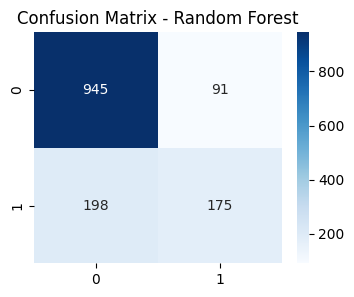

In [39]:
# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Step 10: Save Best Model and Scaler

In [41]:
with open("model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ Model and Scaler saved successfully!")


✅ Model and Scaler saved successfully!
